# Project : EMPLOYEE SALARIES FOR DIFFERENT JOB ROLES

The goal of this project is to **identify and analyze the key factors that impact employee salaries across different industries and regions**. Specifically, this analysis will focus on:

1. **Examining year-over-year salary trends**  
   - To understand economic or industry shifts over time.


2. **Understanding the impact of experience levels on compensation**  
   - Highlights salary progression within different career paths.


3. **Exploring salary differences by employment type**  
   - Compares roles such as full-time, part-time, and contract positions to reveal high-paying job titles.


4. **Investigating location-based salary variations**  
   - Accounts for regional disparities in pay across various roles and industries.


5. **Assessing the influence of remote work on salaries**  
   - Determines if remote roles offer competitive compensation compared to on-site roles.


6. **Evaluating the correlation between company size and employee salaries**  
   - Helps understand how organizational scale affects pay and benefits.


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 


In [2]:
df = pd.read_csv("ds_salaries.csv")
df.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [72]:
df.select_dtypes(include = 'object').columns

Index(['experience_level', 'employment_type', 'job_title',
       'employee_residence', 'company_location', 'company_size'],
      dtype='object')

In [73]:
df.select_dtypes(include = ['int', 'float']).columns

Index(['work_year', 'salary', 'salary_in_usd', 'remote_ratio'], dtype='object')

## Data Cleaning 

In [4]:
# drop unrelevant column 
df = df.drop(['Unnamed: 0', 'salary_currency'], axis=1)


#### To understand short abbreviation convert this into full form

In [5]:
df["experience_level"] = df["experience_level"].str.replace("SE","Senior")
df["experience_level"] = df["experience_level"].str.replace("MI","Mid-level")
df["experience_level"] = df["experience_level"].str.replace("EN","Entry-level")
df["experience_level"] = df["experience_level"].str.replace("EX","Executive")

In [6]:
df["employment_type"] = df["employment_type"].str.replace("FT", "Full-Time")
df["employment_type"] = df["employment_type"].str.replace("PT", "Part-Time")
df["employment_type"] = df["employment_type"].str.replace("CT", "Contract")
df["employment_type"] = df["employment_type"].str.replace("FL", "Freelance")


In [8]:
country_map = {
    "US": "United States",
    "GB": "United Kingdom",
    "CA": "Canada",
    "DE": "Germany",
    "IN": "India",
    "FR": "France",
    "ES": "Spain",
    "GR": "Greece",
    "JP": "Japan",
    "NL": "Netherlands",
    "AT": "Austria",
    "PT": "Portugal",
    "PL": "Poland",
    "LU": "Luxembourg",
    "PK": "Pakistan",
    "BR": "Brazil",
    "AE": "United Arab Emirates",
    "MX": "Mexico",
    "AU": "Australia",
    "TR": "Turkey",
    "DK": "Denmark",
    "IT": "Italy",
    "CZ": "Czech Republic",
    "SI": "Slovenia",
    "RU": "Russia",
    "CH": "Switzerland",
    "NG": "Nigeria",
    "CN": "China",
    "BE": "Belgium",
    "VN": "Vietnam",
    "EE": "Estonia",
    "AS": "American Samoa",
    "DZ": "Algeria",
    "MY": "Malaysia",
    "MD": "Moldova",
    "KE": "Kenya",
    "SG": "Singapore",
    "CO": "Colombia",
    "IR": "Iran",
    "CL": "Chile",
    "MT": "Malta",
    "IL": "Israel",
    "UA": "Ukraine",
    "IQ": "Iraq",
    "RO": "Romania",
    "HR": "Croatia",
    "NZ": "New Zealand",
    "HU": "Hungary",
    "HN": "Honduras",
    "IE": "Ireland"
}

# Replace abbreviations using the map
df["company_location"] = df["company_location"].replace(country_map)


In [9]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,Mid-level,Full-Time,Data Scientist,70000,79833,Germany,0,Germany,L
1,2020,Senior,Full-Time,Machine Learning Scientist,260000,260000,Japan,0,Japan,S
2,2020,Senior,Full-Time,Big Data Engineer,85000,109024,United Kingdom,50,United Kingdom,M
3,2020,Mid-level,Full-Time,Product Data Analyst,20000,20000,Honduras,0,Honduras,S
4,2020,Senior,Full-Time,Machine Learning Engineer,150000,150000,United States,50,United States,L


# EDA

## Salary Trends Over Time

Text(0.5, 1.0, 'Average Salary Trend Over Time')

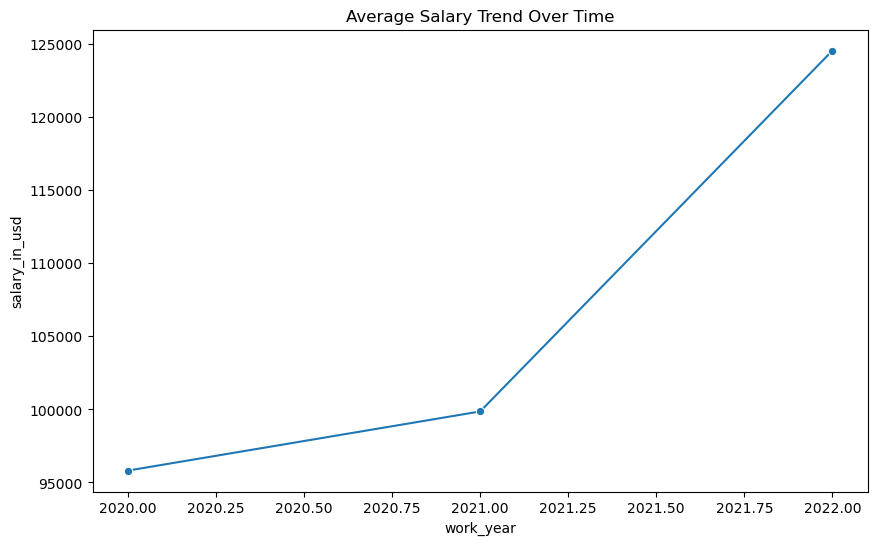

In [10]:
salary_trend = df.groupby('work_year')['salary_in_usd'].mean().reset_index()

# Plotting the salary trend
plt.figure(figsize=(10, 6))
sns.lineplot(data=salary_trend, x='work_year', y='salary_in_usd', marker='o')
plt.title('Average Salary Trend Over Time')

## Impact of Experience Level on Salary

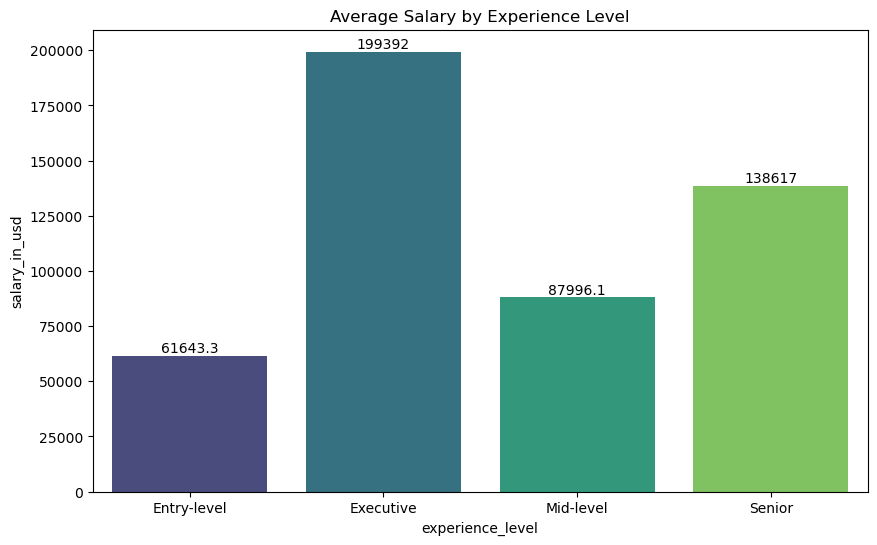

In [11]:
experience_salary = df.groupby('experience_level')['salary_in_usd'].mean().reset_index()

plt.figure(figsize=(10, 6))
ax = sns.barplot(data=experience_salary, x='experience_level', y='salary_in_usd', palette='viridis')
plt.title('Average Salary by Experience Level')
for i in ax.containers:
    ax.bar_label(i)

## Salary Differences by Employment Type


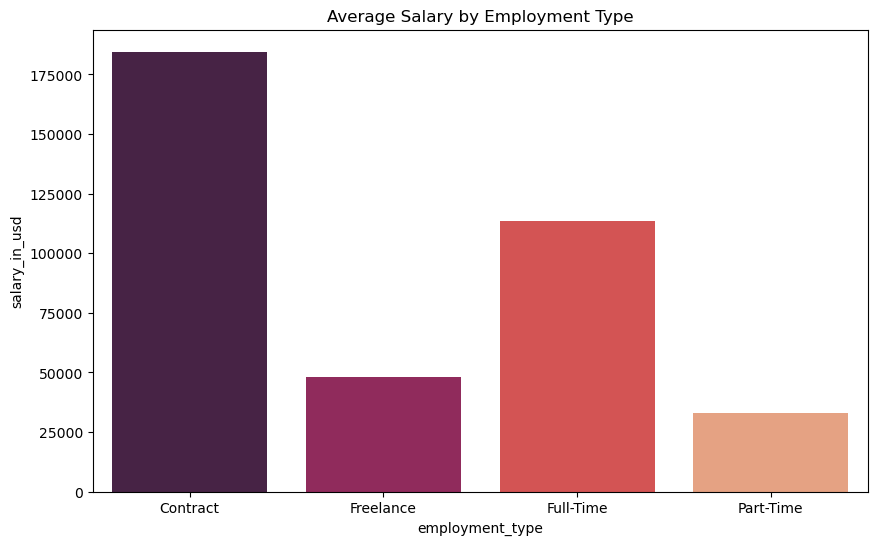

In [34]:
employment_salary = df.groupby('employment_type')['salary_in_usd'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(data=employment_salary, x='employment_type', y='salary_in_usd', palette='rocket')
plt.title('Average Salary by Employment Type');

## Job Title Salary Comparison

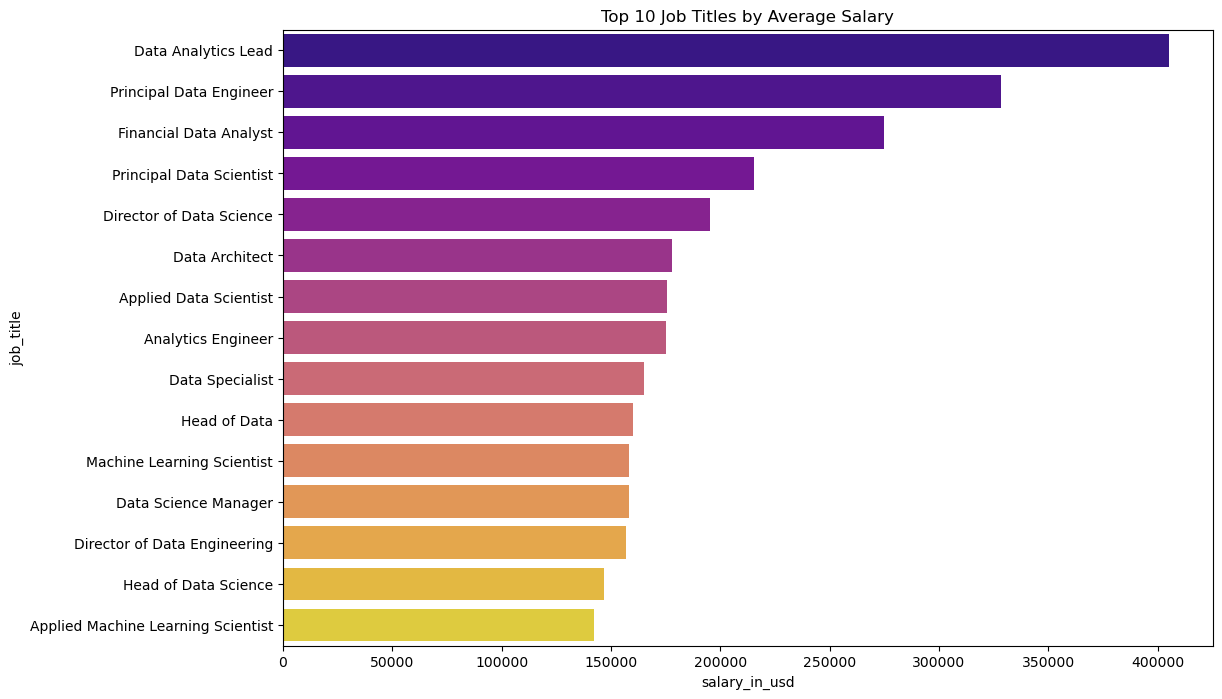

In [33]:
job_title_salary = df.groupby('job_title')['salary_in_usd'].mean().reset_index().sort_values(by='salary_in_usd', ascending=False)

# Plotting the salary by job title (Top 10)
plt.figure(figsize=(12, 8))
sns.barplot(data=job_title_salary.head(15), x='salary_in_usd', y='job_title', palette='plasma')
plt.title('Top 10 Job Titles by Average Salary');

## Location-Based Salary Analysis

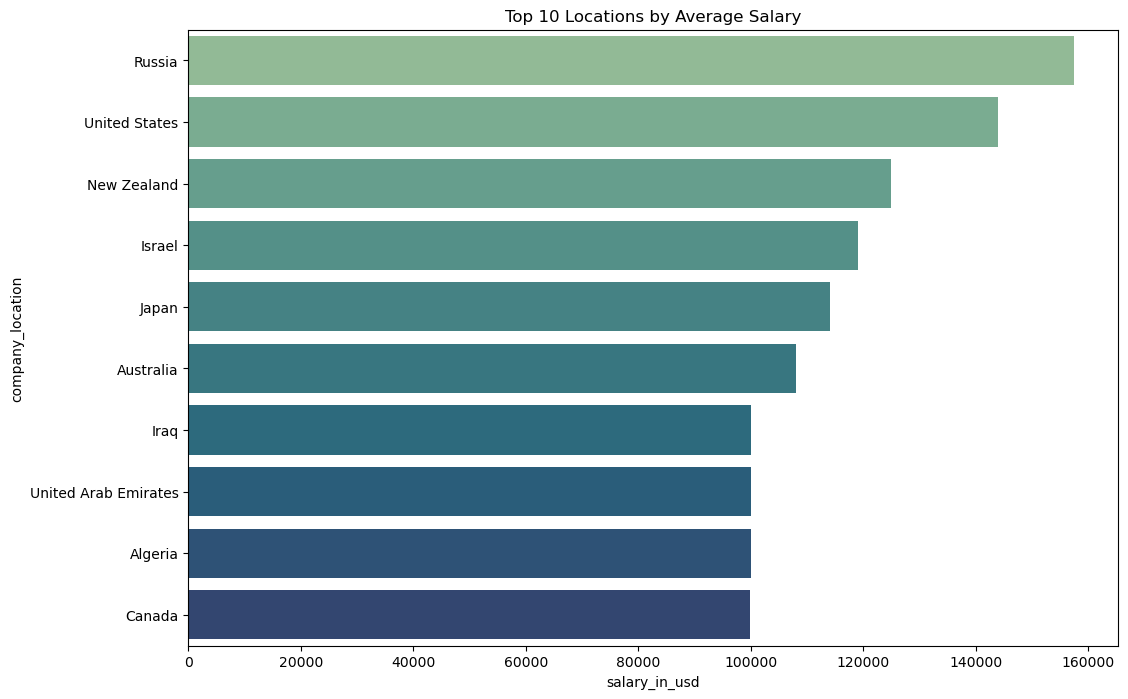

In [32]:
location_salary = df.groupby('company_location')['salary_in_usd'].mean().reset_index().sort_values(by='salary_in_usd', ascending=False)
plt.figure(figsize=(12, 8))
sns.barplot(data=location_salary.head(10), x='salary_in_usd', y='company_location', palette='crest')
plt.title('Top 10 Locations by Average Salary');

## Remote Work Trends

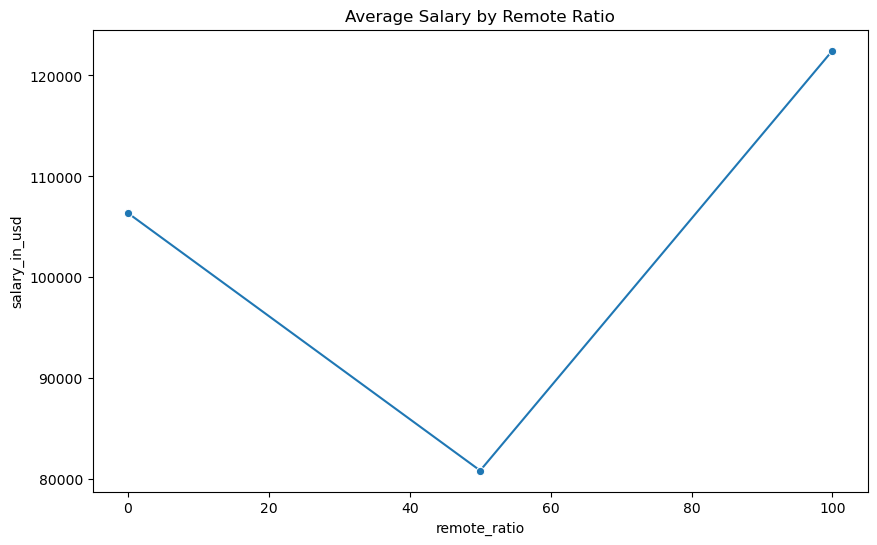

In [31]:
remote_salary = df.groupby('remote_ratio')['salary_in_usd'].mean().reset_index()

# Plotting the salary by remote ratio
plt.figure(figsize=(10, 6))
sns.lineplot(data=remote_salary, x='remote_ratio', y='salary_in_usd', marker='o')
plt.title('Average Salary by Remote Ratio');

## Company Size and Salary Correlation

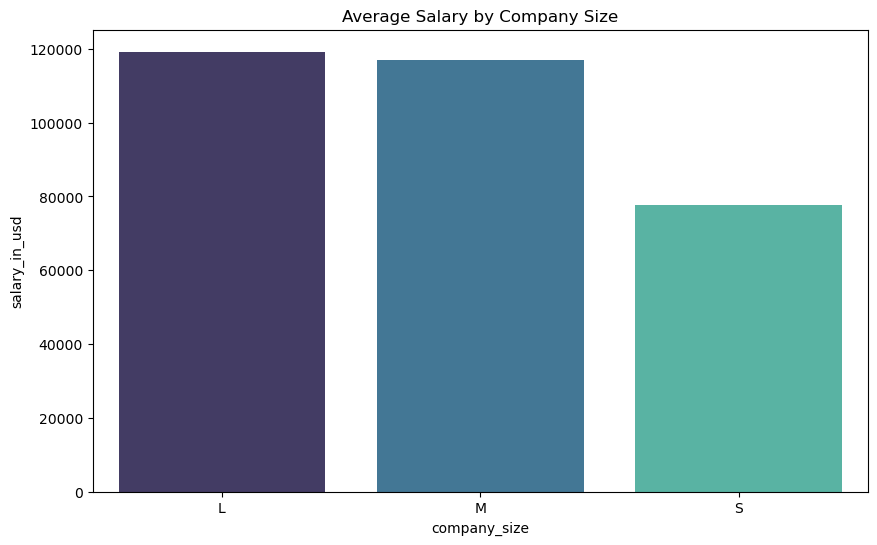

In [30]:
company_size_salary = df.groupby('company_size')['salary_in_usd'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(data=company_size_salary, x='company_size', y='salary_in_usd', palette='mako')
plt.title('Average Salary by Company Size');

## Correlation

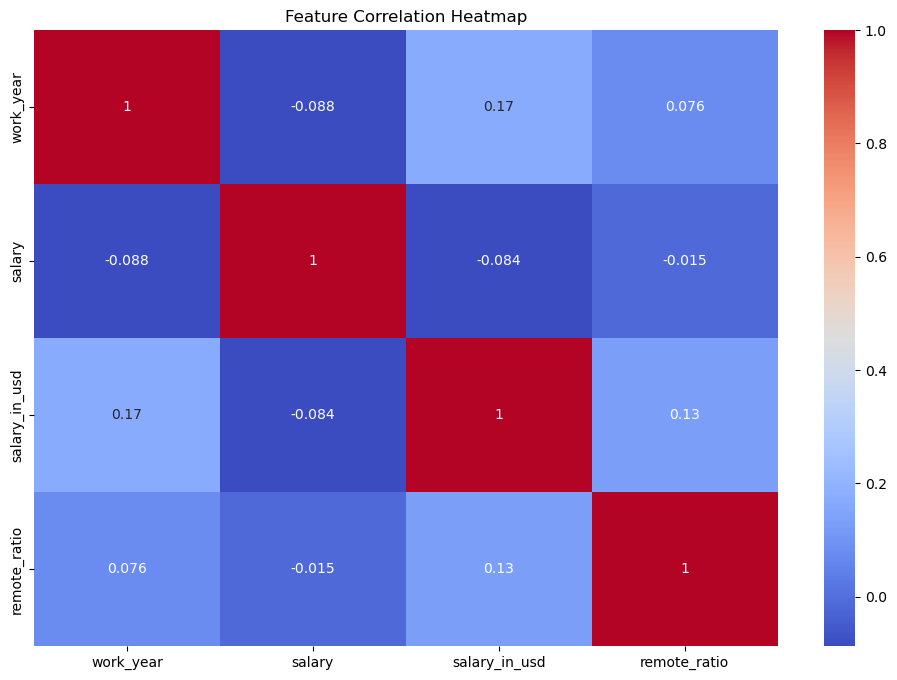

In [29]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap');

In [18]:
# Calculate year-over-year growth rate
salary_trend['growth_rate'] = salary_trend['salary_in_usd'].pct_change() * 100
salary_trend

,work_year,salary_in_usd,growth_rate
0,2020,95813.000000,NaN
1,2021,99853.792627,4.217374
2,2022,124522.006289,24.704333


## Salary Growth with Tenure by Company Size

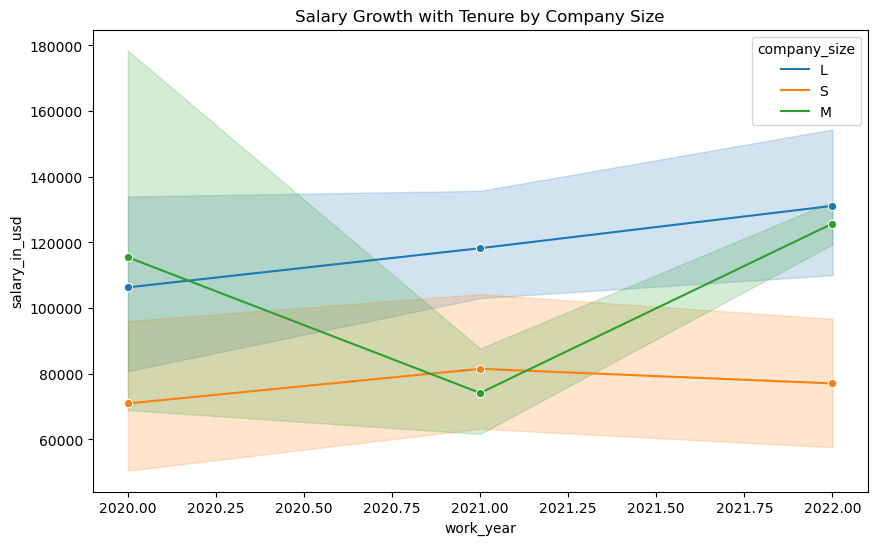

In [28]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='work_year', y='salary_in_usd', hue='company_size', marker='o')
plt.title('Salary Growth with Tenure by Company Size');

## Salary by Remote Ratio and Company Size

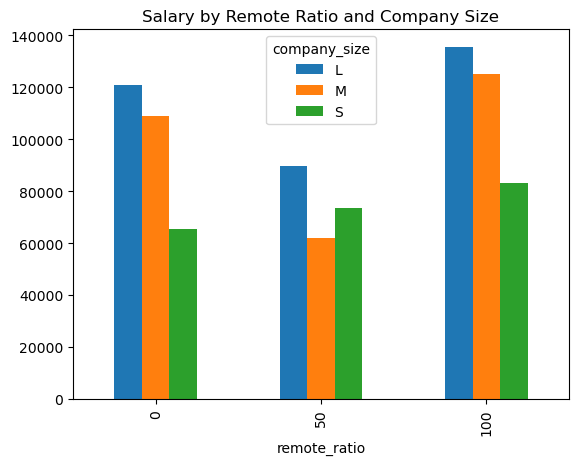

In [37]:
remote_company_salary = df.groupby(['remote_ratio', 'company_size'])['salary_in_usd'].mean().unstack()
remote_company_salary.plot(kind='bar', title='Salary by Remote Ratio and Company Size');

## Experience Level Salary Comparison by Company Size

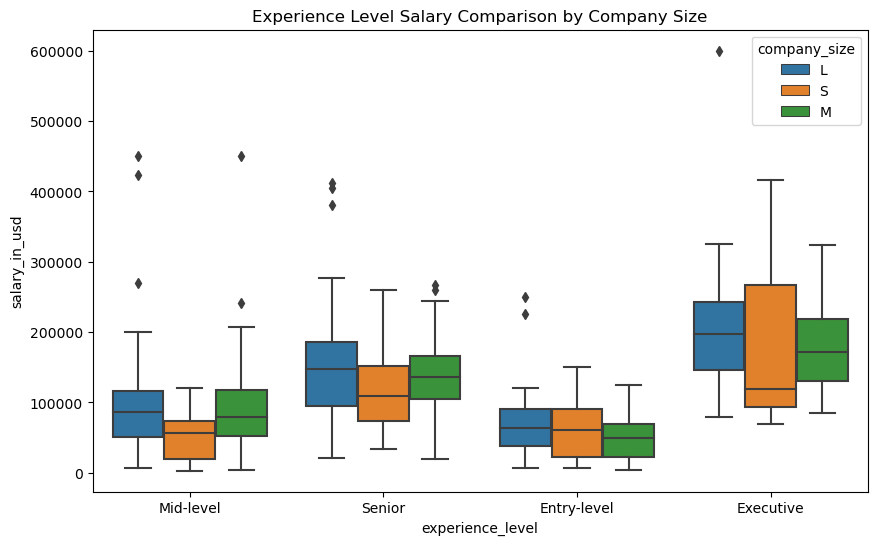

In [43]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='experience_level', y='salary_in_usd', hue='company_size')
plt.title('Experience Level Salary Comparison by Company Size');


## EMPLOYEE SALARIES FOR DIFFERENT JOB ROLS

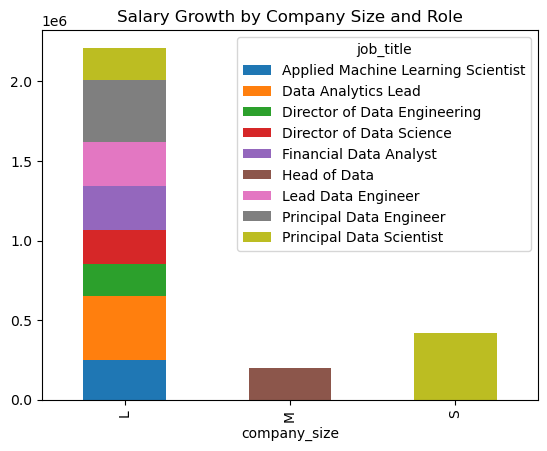

In [168]:
# Company size impact on promotion and salary growth
company_growth = df.groupby(['company_size', 'job_title'])['salary_in_usd'].mean().nlargest(10).unstack()
company_growth.plot(kind='bar', stacked=True, title='Salary Growth by Company Size and Role');


## Model : RandomForestRegressor

In [167]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer



# Define features and target variable
X = df.drop(['salary_in_usd'], axis=1)
y = df['salary_in_usd']

# Preprocessing
# Categorical columns to encode
categorical_cols = ['experience_level', 'employment_type', 'job_title', 'employee_residence', 'company_location', 'company_size']

# Define a column transformer to handle categorical variables
preprocessor = ColumnTransformer(
    transformers=[
        ('num', SimpleImputer(strategy='mean'), ['work_year', 'salary', 'remote_ratio']),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)  # Ignore unknown categories
    ]
)

# Create a pipeline with preprocessing and model
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(random_state=42))
])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')


Mean Absolute Error: 6314.342049180328
Mean Squared Error: 418302388.6659205
R^2 Score: 0.8908558803785726
